In [1]:
import numpy as np
#!pip install - Ugudhi
from numpy import linalg as LA
import matplotlib.pyplot as plt
#from scipy.special import gamma
#from scipy import ndimage
#from scipy.fftpack import ifftn
#from scipy.fft import fft, ifft, fftfreq, fftshift, ifftn
#from scipy.stats import gamma
#import scipy.stats as stats
#import scipy.special as sps
#from colorsys import hls_to_rgb
#from scipy.integrate import odeint
#import scipy.special as sf

In [2]:
z = np.arange(-10, 10, .25)
b = np.arange(-10, 10, .25)

Z, B = np.meshgrid(z,b)

sad = Z*Z*Z*Z - 6*B*B*Z*Z + B*B*B*B

def divergence(sad):
    return np.sum(np.gradient(sad), axis=0)

GG = divergence(sad)
HH = divergence(GG)
II = GG/HH

/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


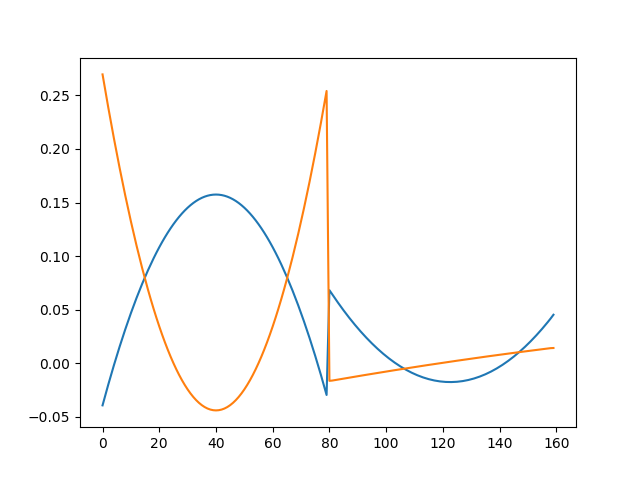

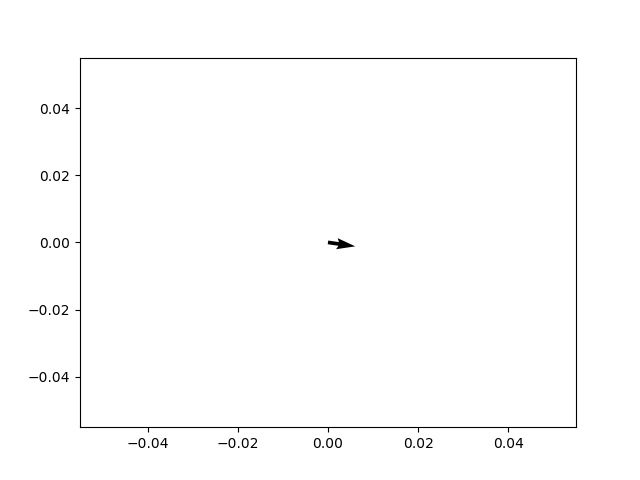

In [3]:
#data = np.stack((sad, GG), axis=0)
data = np.stack((sad, GG))
cov = np.cov(sad, GG)

#plt.plot(cov)
#plt.show()

#https://stackoverflow.com/questions/54644957/how-to-plot-largest-and-smallest
#-eigen-vectors-for-2-dimensional-data-using-num

eigen_values, eigen_vectors = LA.eig(cov)

eig_vec1 = eigen_vectors[:,0]
eig_vec2 = eigen_vectors[:,1]

#plt.scatter(eig_vec1, eig_vec2)
#plt.plot(eig_vec1/eig_vec2)
plt.plot(eig_vec2)
plt.plot(eig_vec1)
plt.show()

#https://www.youtube.com/watch?v=-2bBukw4az8
#https://www.youtube.com/watch?v=AeIttlCdFXU

plt.quiver(0,0, eigen_values @ eig_vec1, eigen_values @ eig_vec2)
plt.show()

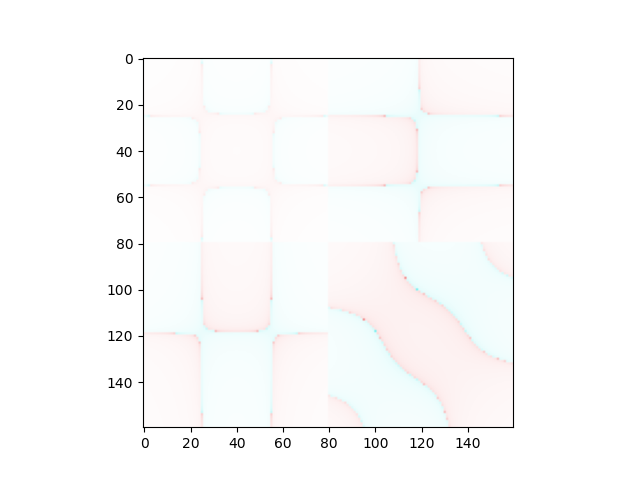

In [4]:
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c

N=1000
x,y = np.ogrid[-5:5:N*1j, -5:5:N*1j]
z = cov #x + 1j*y

#w = 1/(z+1j)**2 + 1/(z-2)**2
img = colorize(cov)
plt.imshow(img)
plt.show()

In [4]:
galaxy = ndimage.convolve (GG, Z, mode='constant')

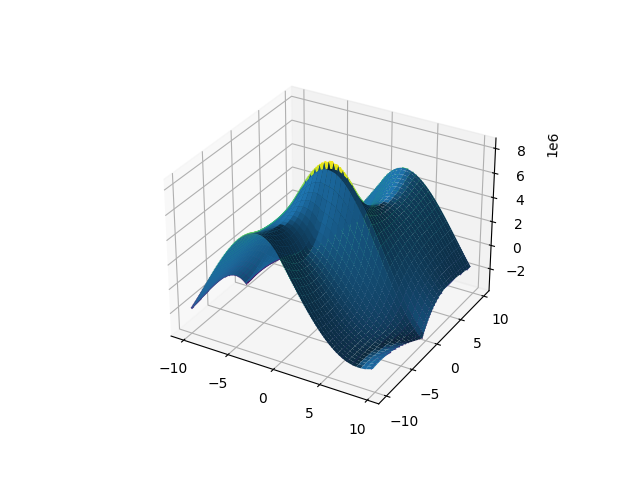

In [4]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax.plot_wireframe(X, Y, FFF)
#ax.contour3D(X, Y, FFF, 30)
ax.contour3D(Z, B, galaxy, 100)
ax.plot_surface(Z,B,galaxy)
plt.show()

In [10]:
data = galaxy #plt.contourf(X, Y, FFF)
data_x, data_y = data.shape
xd, yd = np.ogrid[0:data_x, 0:data_y]

r_data = np.hypot(xd - data_x/2, yd - data_y/2)
data_bin = (80 * r_data/r_data.max()).astype(np.int)
radial_mean = ndimage.mean(data, labels=data_bin, index=np.arange(1, data_bin.max() + 1))

#plt.plot(data_bin,radial_mean)
#plt.show()

<ipython-input-10-25e0d97c4b9a>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_bin = (80 * r_data/r_data.max()).astype(np.int)


In [11]:
#image center
cen_x = 0
cen_y = 0

#image parameters
img_a = galaxy.shape[0]
img_b = galaxy.shape[1]

#find radial distances
[XX, YY] = np.meshgrid(np.arange(img_b) - cen_x, np.arange(img_a) - cen_y)
Rad = np.sqrt(np.square(XX) + np.square(YY))
rad = np.arange(1, np.max(Rad), 1)

intensity = np.zeros(len(rad))
index = 0
bin_size = 1

for i in rad:
    mask = (np.greater(Rad, i - bin_size) & np.less(Rad, i + bin_size))
    values = galaxy[mask]#**2
    intensity[index] = np.mean(values)
    index += 1

#plt.plot(rad, intensity)
#plt.xlim(0,50)
#plt.ylim(0,34500000)
#plt.xlabel('Frequency (1/s)')
#plt.ylabel('Power')
#plt.title('Evans Power Spectrum')
          # (Sprinnkled (toasted, crushed) Nut Spectrum)')
#plt.show()

In [ ]:
#Physics

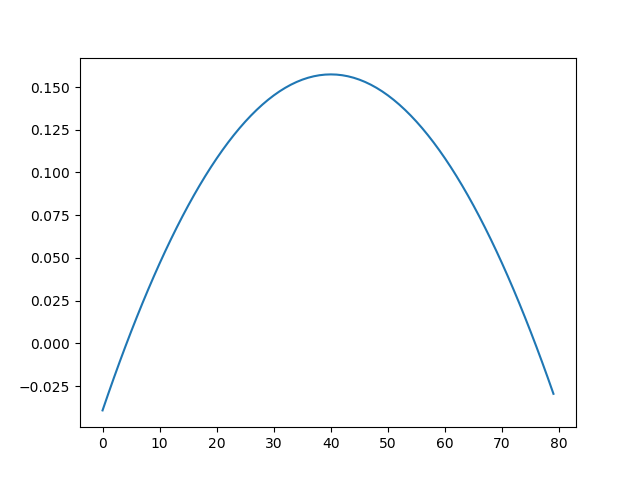

(7.347215471732027+0j)

In [6]:
#plt.plot(eig_vec1/eig_vec2, eig_vec1)

kinetic = []
potential = []
time = []
delta = []
acc = []


for i in range(80):
    time.append([i])
    potential.append(eig_vec1[i])
    kinetic.append(eig_vec2[i])
    delta.append(kinetic[i]/potential[i])
    acc.append(eigen_vectors)
    #acc.append(eig_vec23[i])
    #kinetic.append(eig_vec1)
    #potential.append(eig_vec2)

ac = list(reversed(acc))

plt.plot(time, kinetic)
#plt.plot(time, ac)
plt.show()

np.sum(kinetic)

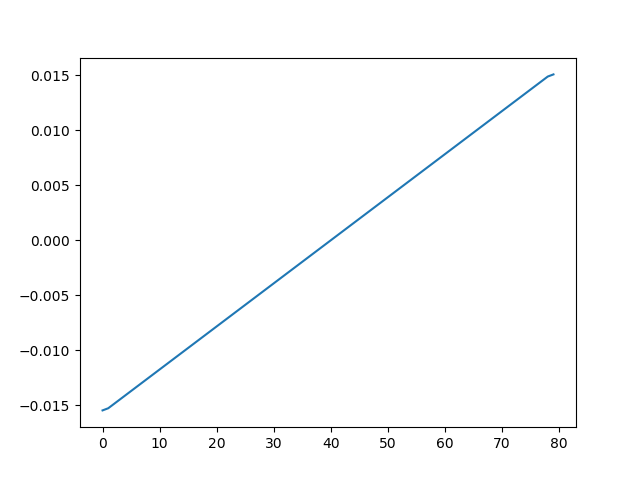

(-0.01567520579414322+0j)

In [7]:
def divergence2(potential):
    return np.gradient(potential)


field = divergence2(potential)

plt.plot(field)
plt.show()

np.sum(field)

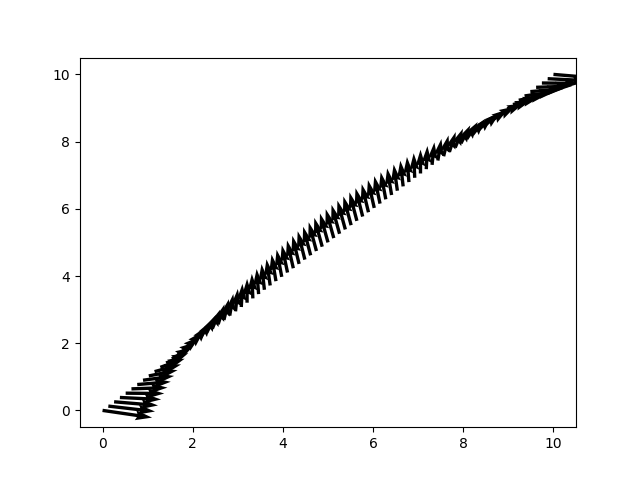

In [7]:
space = np.linspace(0,10,79)


plt.quiver(space, space, potential, kinetic)
#plt.streamplot(space, space, space, kinetic)
plt.show()

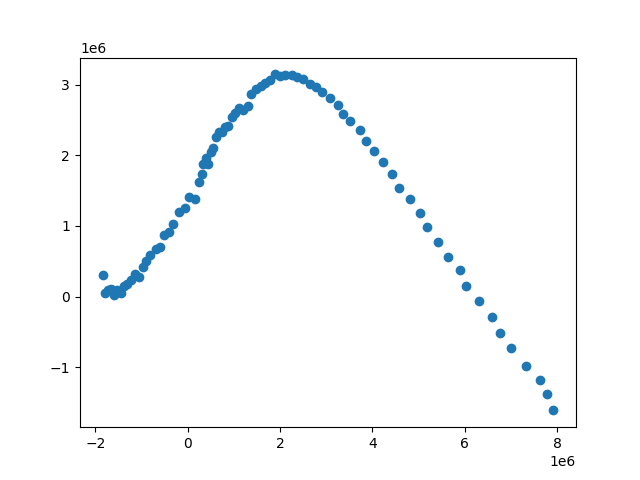

In [15]:
intensity_a = []

for i in range(80):
    intensity_a.append(intensity[i])

plt.scatter(radial_mean, intensity_a)
plt.show()

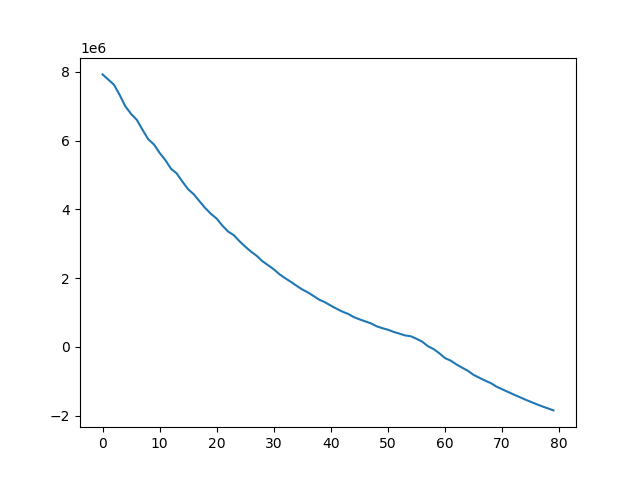

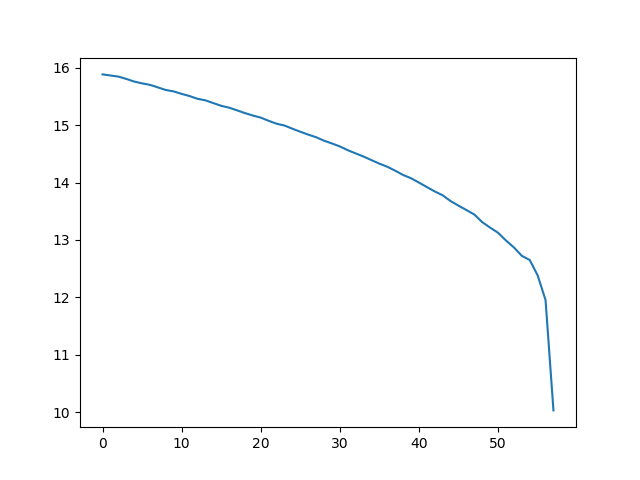

In [10]:
plt.plot(radial_mean)
plt.show()

#https://stats.stackexchange.com/questions/265820/understanding-power-laws-and
#-log-plots-newman-paper
#http://low-sky.github.io/powerlaw/
#https://stats.stackexchange.com/questions/440650/what-distribution-should-i-fit
#-to-this-data
#https://www.youtube.com/watch?v=yjeMEuK6hik
#https://medium.com/@ph_singer/not-every-long-tail-is-power-law

log_rad = np.log(radial_mean)
rad_mean = []

for i in range(80):
    rad_mean.append(log_rad[i])
    
log_rad
    
len(rad_mean)

plt.plot(rad_mean)

#plt.plot(rad_mean[0])
#plt.show()

#rad_mean

#np.log(rad_mean)
#radial_mean
plt.show()

In [ ]:
#Statistics

205.72709245323972 -181.46455926557576 0.6271592768990817
-52.45 77.14750000000001


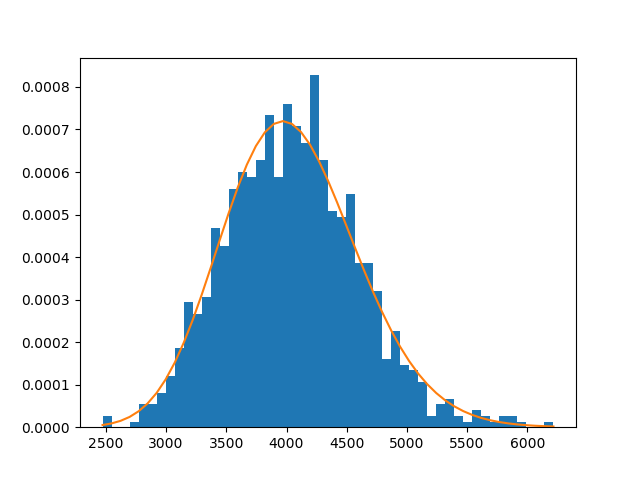

In [12]:
#https://stackoverflow.com/questions/40979643/python-how-to-fit-a-gamma
#-distribution-from-data

#https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d
#-data

#https://stackoverflow.com/questions/39330483/fitting-location-parameter-in-the
#-gamma-distribution-with-scipy

#https://stackoverflow.com/questions/2896179/fitting-a-gamma-distribution-with
#-python-scipy

#https://stats.stackexchange.com/questions/243973/is-my-data-gamma
#-distributed

#https://pythonguides.com/python-scipy-gamma/

#https://www.youtube.com/watch?v=IUcvPo2WCB8

#plt.plot(radial_mean,-data_bin[70])

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(-data_bin[70])#/radial_mean)
print(fit_alpha, fit_loc, fit_beta)

gam_x = np.linspace(gamma.ppf(0.01, fit_alpha), gamma.ppf(0.99, fit_alpha), 100)

#plt.plot(gam_x, gamma.pdf(gam_x, fit_alpha))

#plt.plot(gamma.pdf(r,fit_alpha))

#plt.plot(gamma.pdf(r,4))


mean = np.mean(-data_bin[70])#/radial_mean)
var = np.var(-data_bin[70])#/radial_mean)
print(mean, var)

shape, scale = -mean, var

gma = np.random.gamma(shape, scale, 1000)

#plt.hist(gma, 50, density=True)

count, bbins, ignored = plt.hist(gma, 50, density=True)

y_gma = bbins**(shape-1)*(np.exp(-bbins/scale) / (sps.gamma(shape)*scale**shape))

plt.plot(bbins, y_gma)

#gamma = gamma.pdf(r, radial_mean)
#plt.plot(r, gamma)


#plt.plot(r, gamma.pdf(radial_mean, -data_bin[70]))
#plt.plot(radial_mean)
#plt.hist(galaxy, bins='auto')
plt.show()

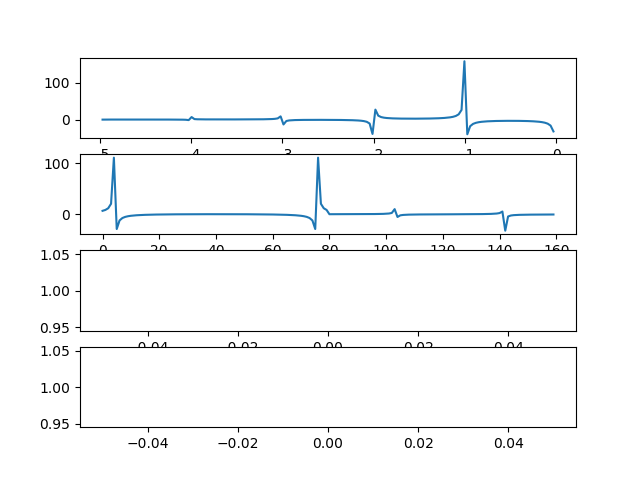

In [5]:
dom = np.linspace(-5, 0, 160)
dom_p = np.linspace(0, 5, 160)

gam = gamma(dom)
gam_p = gamma(dom_p)

eig_vec1s = eig_vec1/32
eig_vec2s = eig_vec1/32
#eig_rev = 

#gam_frr = list(reversed(gam_two))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(dom,gam)
ax2.plot(-eig_vec1/eig_vec2)
ax3.plot(1)#eig_amm)
ax4.plot(1)#dom_p,gam_p)
#ax3.plot(gam_frr)
#ax2.plot(-eig_vec1s/eig_vec2s)


#plt.plot(eig_vec1/eig_vec2)
#plt.plot(dom,gam)

plt.show()

In [16]:
alpha = shape
beta = scale

mean = alpha*beta
variance = alpha * beta ** 2

#what is the probability that time is between X(4) and Y(8)?

stat.gamma(8, alpha, 1/beta) - stat.gamma(4, alpha, 1/beta)

#what is the cumulative time

answer = one instance * total time

<class 'SyntaxError'>: invalid syntax (<ipython-input-16-79ebf149ec03>, line 13)

In [17]:
#https://stackoverflow.com/questions/33858166/using-scipy-integrate-quad-to
#-integrate-gamma-function

def f(y, b):
    return y**(a-1) * np.exp(-y)

def g(x, alpha, beta):
    return (1 / ((beta**alpha) * stat.gamma(alpha)) * x**(alpha-1) * np.e**(-x / beta)

b = 3./2
alpha = shape
beta = variance
            
scipy.integrate.quad(g, 0, np.inf, args=b)

<class 'SyntaxError'>: invalid syntax. Perhaps you forgot a comma? (<ipython-input-17-619b6b5e4187>, line 8)

In [ ]:
#https://www.youtube.com/watch?v=DfElR4r85SY

def draw random():
    pmass = [0,1,2,3]
    var, pp, u = 0, pmass[0], np.random.uniform(0,1)
    while (u<pp):
        var = var + 1
        pp = pp + pmass[var]
    return var

In [ ]:
#Saddle Renormalization

In [ ]:
#Myer Action

#def scalar_ricci(u_mon,v_mon):
    #return (-36*(u_mon**2 + v_mon**2)) / (1 + 9 *((u_mon**2 + v_mon**2)**2)**2)
#8 / ((np.abs(g)**2) * (u_mon**2) * v_mon**2)

#det = (eig_vec2) - (eig_vec1)

alpha = shape #fit_alpha

def scalar_ricci(sad,GG):
    return (ans)

def tensor_metric(potential):
    return (potential)

k = constant_Myer/(sp_lght * np.pi)
RS = scalar_ricci(ans)
intg = np.sqrt(tensor_metric(potential))

action_Myer = k * scipy.integrate.quad(RS * intg, 0, np.inf)

action_Myer = np.sqrt(np.pi) * constant_Myer * gamma(alpha)

In [3]:
def func (posx, momentumx):
    return posx**4 - 6*posx**2*momentumx**2 + momentumx**4

def tor (posy, momentumy):
    return np.sqrt(((posy*(((posy-1)**2)*(posy-2))+(np.sin(momentumy**2)))**2))

In [4]:
def pend (S,t):
    posx, posy, momentumx, momentumy = S
    m = t
    dsdt = divergence(posx), m*(func(posx, momentumx) - divergence(S)), momentumx, momentumy
    return dsdt

In [5]:
t = np.linspace(0, 1, 100)

ans = odeint(pend, y0 = [1, 1, 1, 1], t=t)

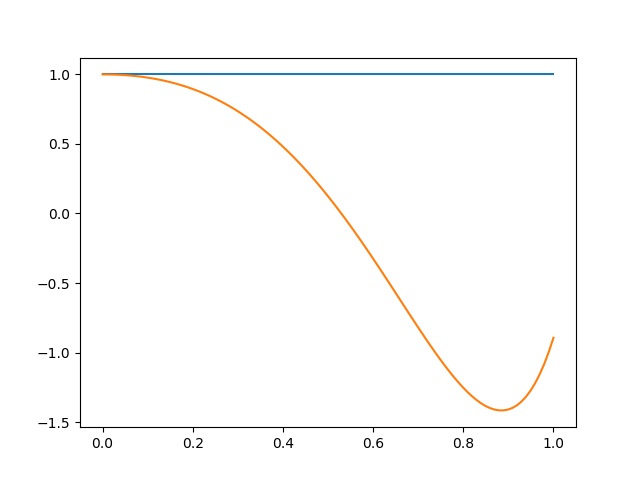

In [6]:
plt.plot(t, ans[:, 0])
plt.plot(t, ans[:, 1])
plt.show()

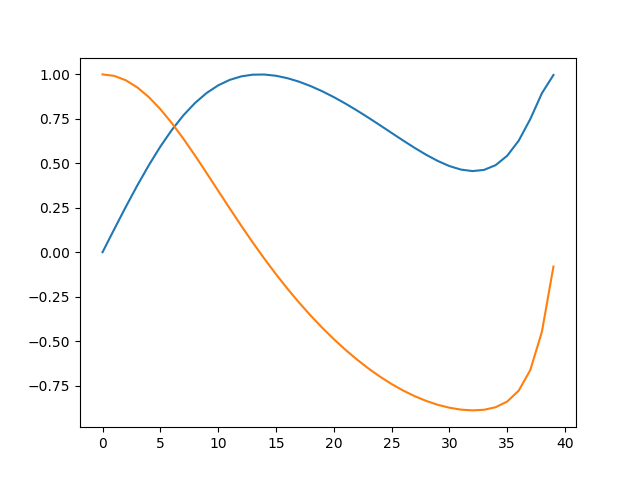

In [3]:
theta = np.linspace(0, 2*np.pi, 50)
rad = np.linspace(0, 1.25, 50)

fun_ell = sf.ellipj(theta,rad)

func_ellip = (sf.ellipj(theta,rad)[0])

plt.plot(func_ellip)

plt.plot(fun_ell[1])
#plt.plot(-fun_ell[1] + 2)
plt.show()

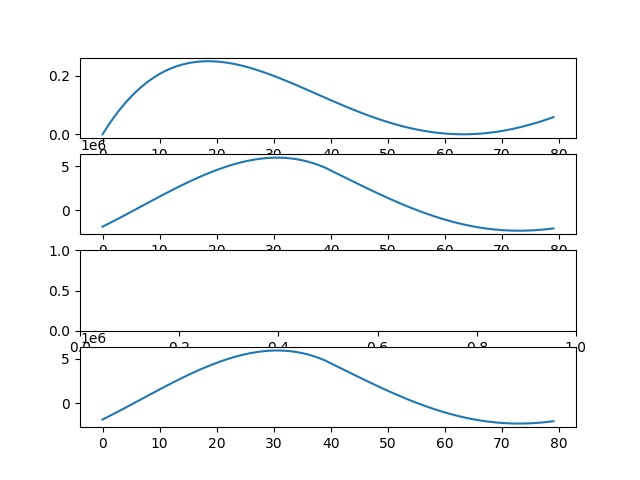

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(doub_tor[0])
ax2.plot(galaxy[0])
#ax3.plot(func_ellip)
ax4.plot(potential[0])
#ax5.plot(eig_1)

plt.show()

In [ ]:
#https://stackoverflow.com/questions/8739227/how-to-solve-a-pair-of-nonlinear
#-equations-using-python

#https://mathworld.wolfram.com/JacobiEllipticFunctions.html

def equations(vars):
    x, y, r, t = vars
    eq1 = np.sqrt(((x*(((y-1)**2)*(y-2))+(x**2))**2))
    eq2 = np.exp(x) + x*y - 3
    eq3 = (2-r**2)*t - 2*t**3
    eq4 = x**2 - y**2
    return [eq1, eq2, eq3, eq4]

x, y, r, t=  fsolve(equations, (1, 1, 1, 1))

print(x, y, r, t)

In [4]:
lower_y = galaxy[0,:]#0#edge**2
upper_y = galaxy[-1,:]#0#-edge**2
lower_x = galaxy[:,0]#0#edge**3
upper_x = galaxy[:,-1]#0#-edge**3

In [5]:
def solve_heat(heatmap, n_iter):
    #cs = heatmap[0].copy()
    #length = len(cs[0])
    length = len(potential[0])
    #cf = 0
    for n in range(n_iter):
        #ns = cs.copy()
        for i in range(1,length-1):
            for j in range(1,length-1):
                potential[j][i] = .250 * (potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return heatmap

In [6]:
potential = np.zeros((80,80))
potential[0,:] = lower_y
potential[-1,:] = upper_y
potential[:,0] = lower_x
potential[:,-1] = upper_x
potential = solve_heat(potential, n_iter=100)

#plt.pcolormesh(Z, -B, potential)
#plt.plot(potential)
#plt.show()

In [ ]:
for j in range(70):
    plt.plot(potential[0],potential[:,j])
    #plt.pcolormesh(potential[0],potential[:,j])

plt.show()

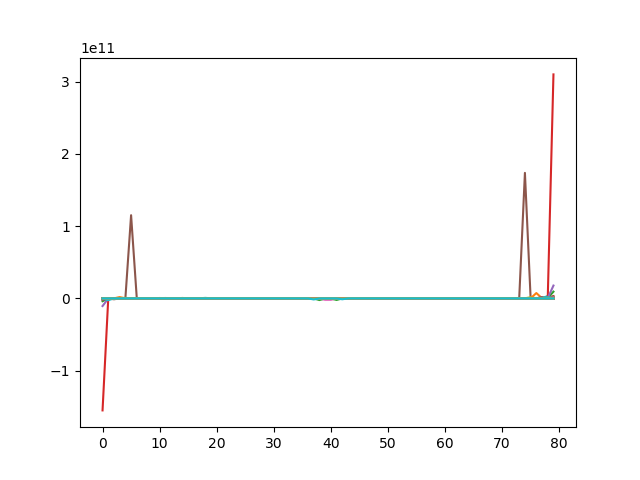

In [22]:
plt.plot(potential / doub_tor)
plt.show()

In [ ]:
#Quantization

In [7]:
val_sad,vec_sad=np.linalg.eig(GG)
z_sad = np.argsort(val_sad)
z_sad = z_sad[0:4]
energies_sad=(val_sad[z_sad]/val_sad[z_sad][0])
print (energies_sad)

[1.00000000e+00-0.j 2.47582252e-01-0.j 1.01022426e-16-0.j
 2.23746852e-17-0.j]


/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


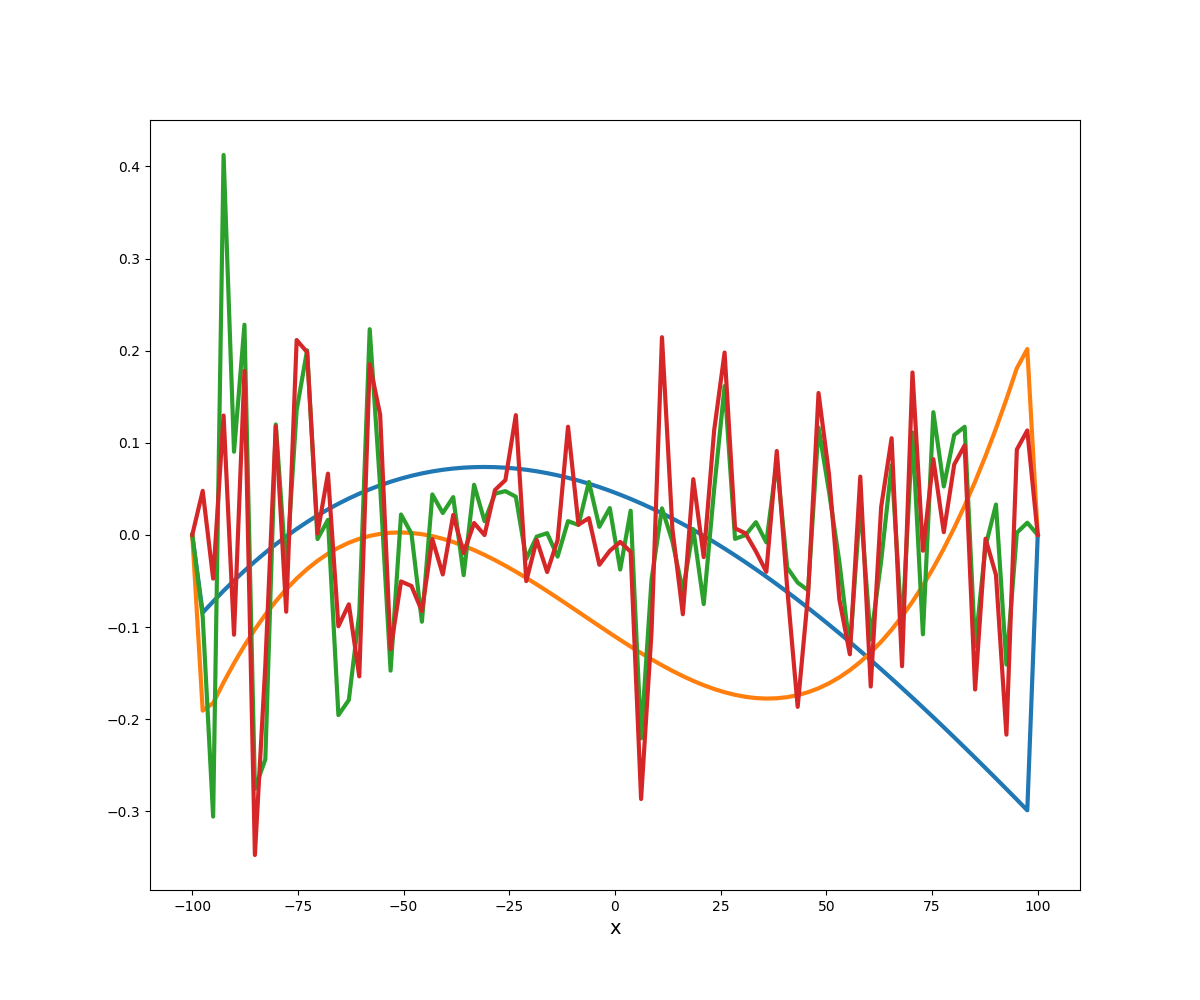

In [8]:
x_sad = np.linspace(-100,100,82)
plt.figure(figsize=(12,10))
for i in range(len(z_sad)):
    y_sad = []
    y_sad = np.append(y_sad,vec_sad[:,z_sad[i]])
    y_sad = np.append(y_sad,0)
    y_sad = np.insert(y_sad,0,0)
    plt.plot(x_sad,y_sad,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)

plt.show()

/lib/python3.10/site-packages/matplotlib/collections.py:1604: ComplexWarning: Casting complex values to real discards the imaginary part
  segments[:, :, pos_idx] = np.sort(positions)[:, None]


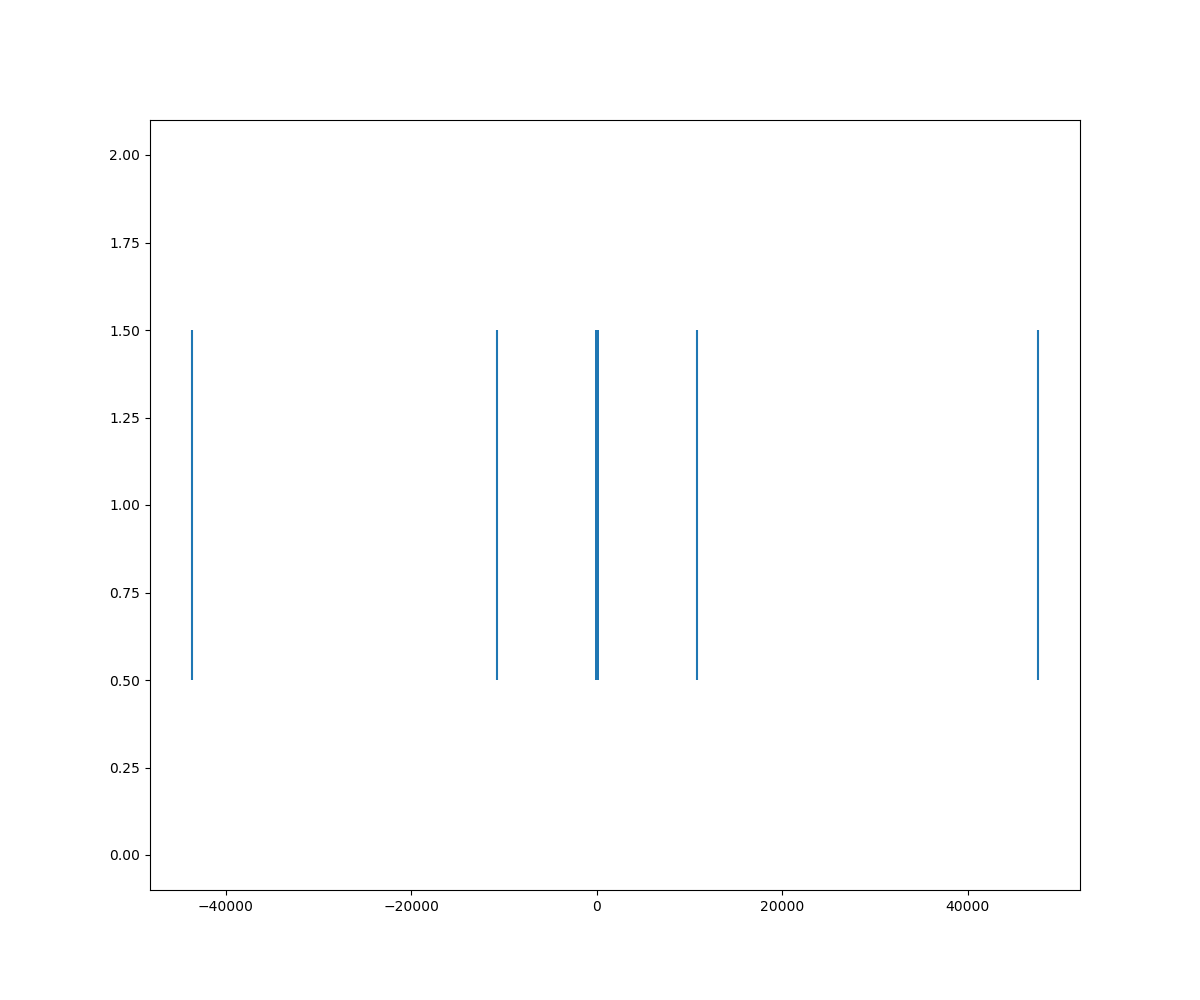

In [9]:
plt.eventplot(val_sad)
plt.show()

In [ ]:
#Wave Mechanics

In [4]:
kinetic = []
potential = []
hamil = []
lagr = []

#def system_orbit(space, time):
for i in range(len(z)):
    kinetic.append(eig_vec2[i])
    potential.append(eig_vec1[i])
    hamil.append(kinetic[i] + potential[i])
    lagr.append(kinetic[i] / potential[i])

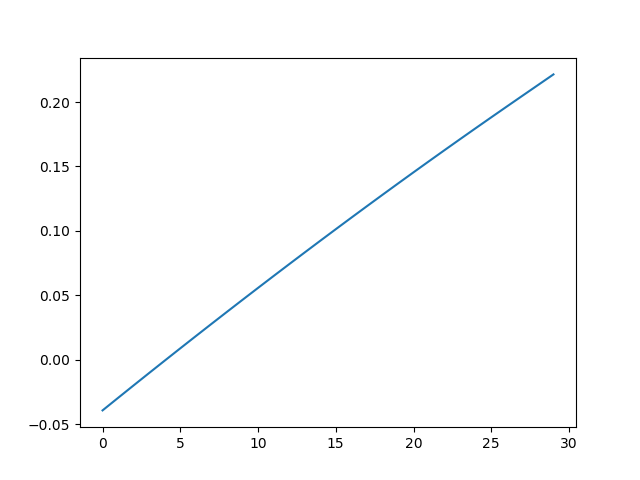

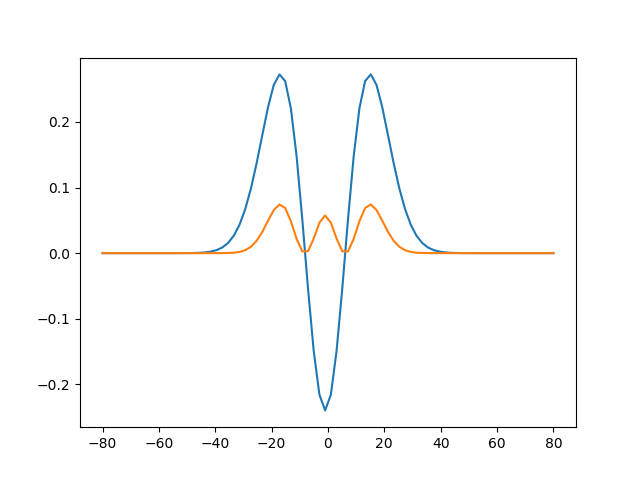

In [5]:
#https://jendrzejewski.synqs.org/post/2021-plotting-in-python/

hbar = 1
m = 1

Ngrid = 80; xmin = -80; xmax = 80
xvec = np.linspace(Ngrid, xmin, xmax)
Vx = potential

dkinetic = np.diff(xvec).mean()

dia = -2* np.ones(Ngrid)
offdia = np.ones(Ngrid - 1)

d2grid = np.mat(np.diag(dia, 0) +  np.diag(offdia, -1) + np.diag(offdia, 1)) / dkinetic**2

d2grid[0,:] = 0
d2grid[Ngrid - 1,:] = 0

delta = -hbar**2 / (2*m) * d2grid

Epotential = np.mat(np.diag(potential, 0))

H = Epotential + delta

w,v = LA.eig(H)

sort = np.argsort(w)
eigen_vec = v[:,sort]
eigen_vals = w[sort]

plt.plot(eigen_vals[0:30])
plt.show()

plt.plot(xvec, np.real(eigen_vec[:,2]))
plt.plot(xvec, np.power(np.abs(eigen_vec[:,2]),2))
plt.show()

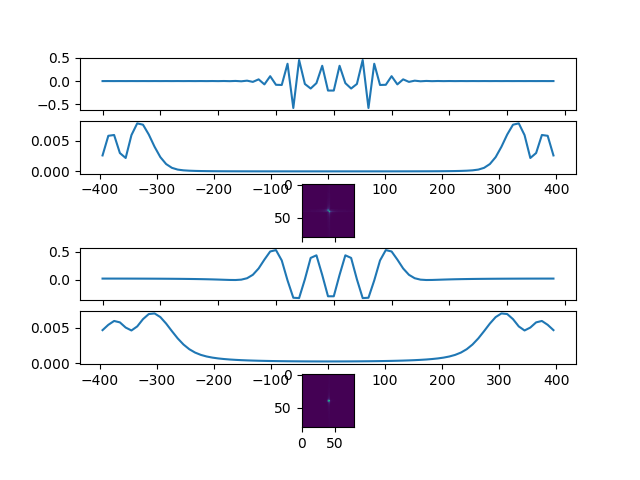

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)
ax1.plot(fft_galaxy)
ax2.plot(xff, 1.0/N_FF * np.abs(yyplot))
ax3.imshow(abs(image))
ax4.plot(fft_hamil)
ax5.plot(xf, 1.0/N_F * np.abs(yplot))
ax6.imshow(abs(im_Gal))
plt.show()

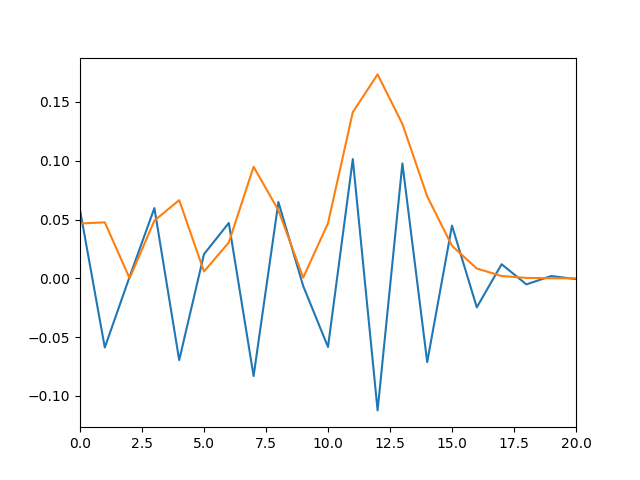

In [5]:
GG_Hamil = []
HH_Hamil = []

for i in range (78):
    #GG_Hamil.append(GG[i])
    #HH_Hamil.append(HH[i])
    GG_Hamil.append(GG[0][i])
for i in range (79):
    HH_Hamil.append(HH[0][i])

    
#a11 = np.full((80,), GG_Hamil[0])
#a22 = np.full((80,), HH_Hamil[0])

a11 = np.full((78,), GG_Hamil)
a22 = np.full((79,), HH_Hamil)

#Hamiltonian_sad = np.diag(GG, -1) +  np.diag(HH_Hamil) + np.diag(GG, 1)
Hamiltonian_sad = np.diag(a11, -1) +  np.diag(a22) + np.diag(a11, 1)

e_val, e_vec = np.linalg.eigh(Hamiltonian_sad)
#e_val, e_vec = LA.eig(Hamiltonian)

#Hamiltonian

j = 3
wave3 = e_vec[:, j] / np.sum(abs(e_vec[:, j]))
prob3 = e_vec[:, j]**2 / np.sum(e_vec[:, j]**2)
plt.plot(wave3)
plt.plot(prob3)
plt.xlim(0,20)
plt.show()

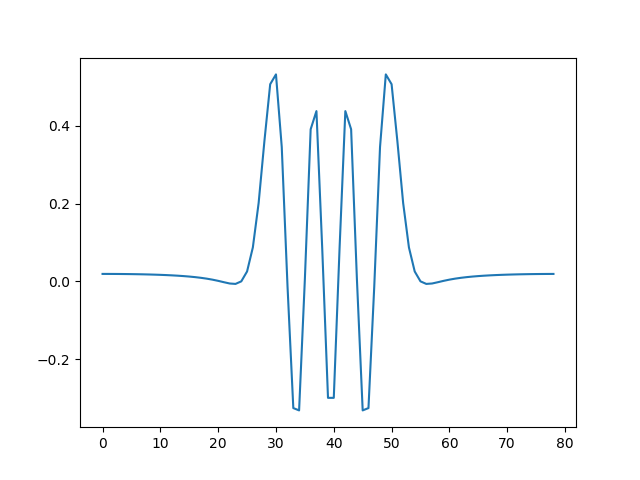

In [6]:
fft_hamil = fft(wave3)
#fft_galaxy = fft(galaxy)

#plt.plot(fft_hamil)
#plt.imshow(fft_hamil)
plt.plot(fft_hamil)
plt.show()

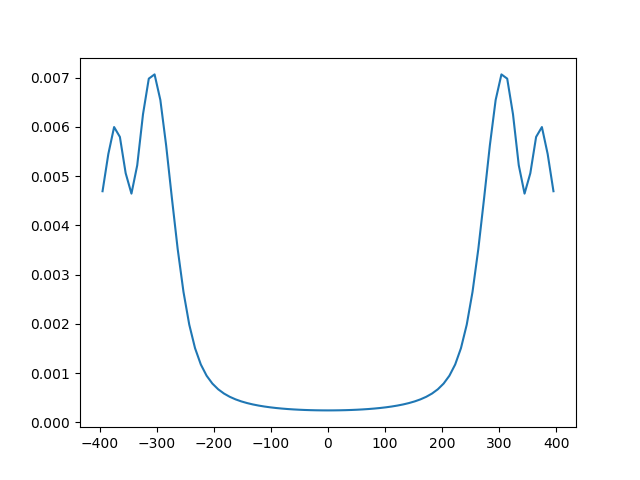

In [7]:
N_F = 79

T_F = 1.0 / 800.0
x_F = np.linspace(0.0, N_F*T_F, N_F, endpoint=False)

xf = fftfreq(N_F, T_F)
xf = fftshift(xf)
yplot = fftshift(fft_hamil)

plt.plot(xf, 1.0/N_F * np.abs(yplot))
plt.show()

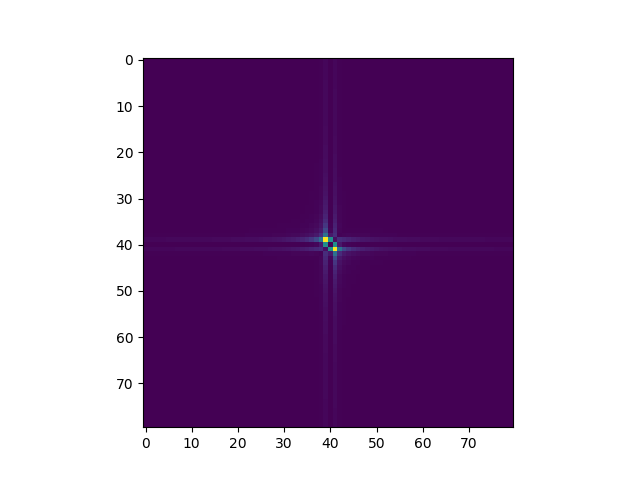

In [8]:
image = np.fft.ifftshift(GG)
image = np.fft.fft2(image)
image = np.fft.fftshift(image)

plt.imshow(abs(image))
plt.show()

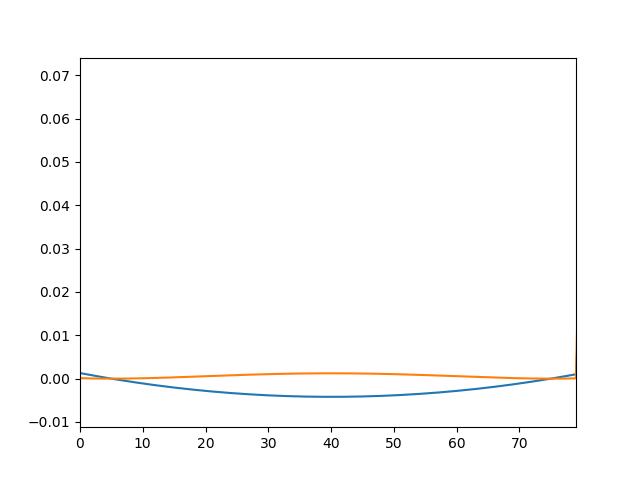

In [9]:
k = 2
wave2 = eigen_vectors[:, k] / np.sum(abs(eigen_vectors[:, k]))
prob2 = eigen_vectors[:, k]**2 / np.sum(eigen_vectors[:, k]**2)
plt.plot(wave2)
plt.plot(prob2)
plt.xlim(0,79)
plt.show()

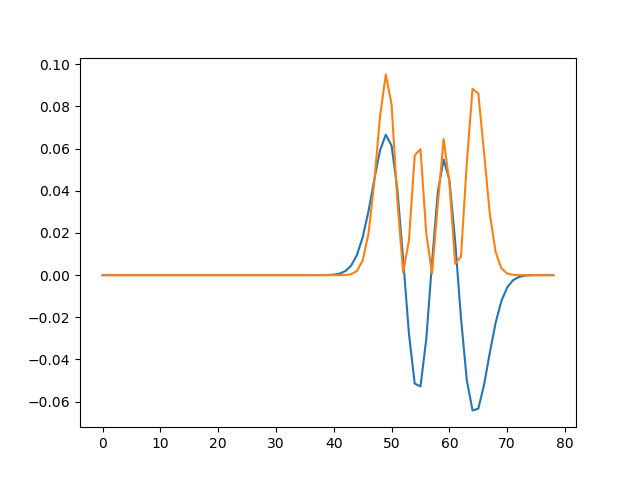

In [10]:
GGZ_Hamil = []
GGO_Hamil = []

GAZ_Hamil = []
GAO_Hamil = []

for i in range (78):
    #GG_Hamil.append(GG[i])
    #HH_Hamil.append(HH[i])
    GGZ_Hamil.append(GG[0][i])
    GAZ_Hamil.append(galaxy[0][i])
for i in range (79):
    GGO_Hamil.append(GG[i][0])
    GAO_Hamil.append(galaxy[i][0])

    
a1111 = np.full((78,), GGZ_Hamil)
a2222 = np.full((79,), GGO_Hamil)

a1113 = np.full((78,), GAZ_Hamil)
a2223 = np.full((79,), GAO_Hamil)

#Hamiltonian_sad = np.diag(GG, -1) +  np.diag(HH_Hamil) + np.diag(GG, 1)
Hamiltonian_GG = np.diag(a1111, -1) +  np.diag(a2222) + np.diag(a1111, 1)
Hamiltonian_GA = np.diag(a1113, -1) +  np.diag(a2223) + np.diag(a1113, 1)

e_valGG, e_vecGG = np.linalg.eigh(Hamiltonian_GG)
e_valGA, e_vecGA = np.linalg.eigh(Hamiltonian_GA)
#e_val, e_vec = LA.eig(Hamiltonian)

#Hamiltonian

j = 3
wave4 = e_vecGG[:, j] / np.sum(abs(e_vecGG[:, j]))
prob4 = e_vecGG[:, j]**2 / np.sum(e_vecGG[:, j]**2)

wave5 = e_vecGA[:, j] / np.sum(abs(e_vecGA[:, j]))
prob5 = e_vecGA[:, j]**2 / np.sum(e_vecGA[:, j]**2)

plt.plot(wave4)
plt.plot(prob4)
#plt.xlim(0,20)
plt.show()

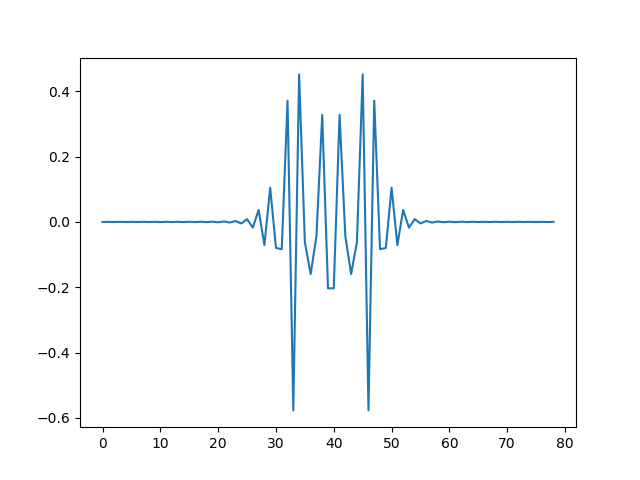

In [11]:
fft_sad = fft(wave4)
fft_galaxy = fft(wave5)
#fft_galaxy = fft(galaxy)

#plt.plot(fft_hamil)
#plt.imshow(fft_hamil)

#plt.plot(fft_sad)
plt.plot(fft_galaxy)
plt.show()

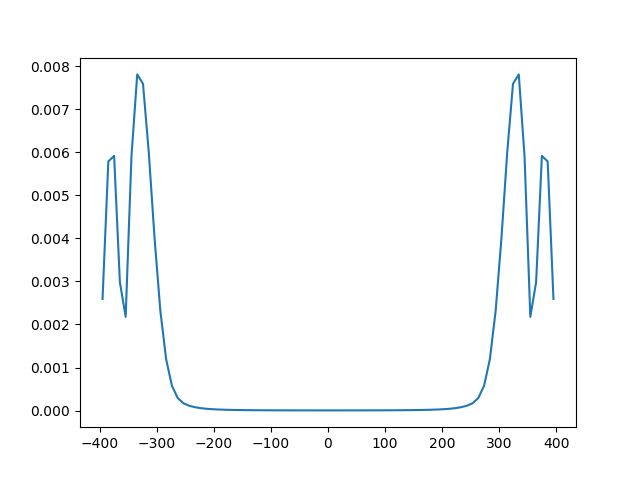

In [12]:
N_FF = 79

T_FF = 1.0 / 800.0
x_FF = np.linspace(0.0, N_FF*T_FF, N_FF, endpoint=False)

xff = fftfreq(N_FF, T_FF)
xff = fftshift(xff)
yyplot = fftshift(fft_galaxy)

plt.plot(xff, 1.0/N_FF * np.abs(yyplot))
plt.show()

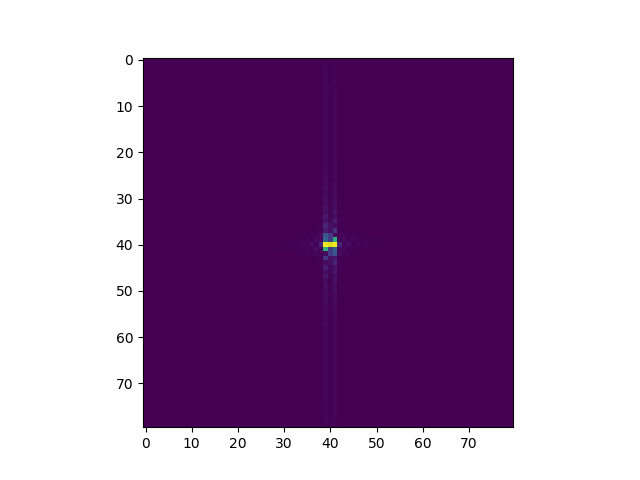

In [13]:
#https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and
#-fourier-synthesis-of-images/

im_Gal = np.fft.ifftshift(galaxy)
im_Gal = np.fft.fft2(im_Gal)
im_Gal = np.fft.fftshift(im_Gal)

plt.imshow(abs(im_Gal))
plt.show()

In [ ]:
#Geometry

In [ ]:
mass_galaxy = (1.5 * (10**9)) #solar masses
area_galaxy = 52,850 * (3 * (10**8)) #light years (metres/second)

(constant_Myer / mass_galaxy / 5.2850), ((constant_Myer / mass_galaxy / 5.2850) -1) * 100

In [ ]:
Eul = ((np.e / (np.pi * constant_strain / 100)) - 1) * 100

water = np.sqrt(((constant_Myer / (3.0 * (10**8)))*np.pi)) * 2

In [ ]:
answer = (5.97219 * 10**24) #kilograms
mass_Newton = answer * (6.6743 * (10**-11))
den_Newton = mass_Newton / (3.0 * (10**8))
den_Myer = den_Newton * (constant_Myer / constant_Newton) * constant_Myer
diam = (den_Myer / (3.0 * (10**8))) / 10
rad_Earth = diam / (2 * np.pi)
rad_Earth, ((rad_Earth - 6371) / rad_Earth) * 100

In [4]:
FF = constant_Myer / (3 * 10**8)
KK = FF * 6371 * 2 * np.pi #* 1.02
JJ = KK / (60*60*24)
JJ #energy per 24 hrs
360 / JJ #days per cycle

30.12604532585744

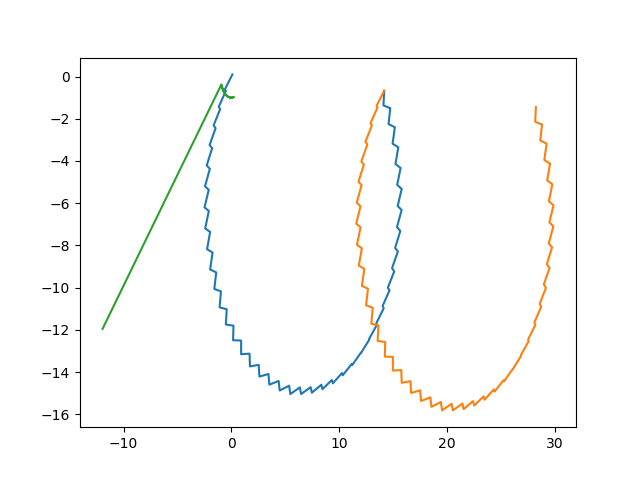

In [8]:
time = []
curve_time = []
curve_space = []
energy = [JJ]
norm_energy = []
pot_eng = []
kin_eng = []
delta_x = []
delta_y = []
pos_x = []
pos_y = []
#coords = []

pos_x.append(.1)
pos_y.append(.1)
for i in range (len(z)):
    time.append([i])
    curve_time.append(GG[(len(z)) - i - 1][i])
    #curve_time.append(GG[(len(z)) - i - 1][i],[i])
    curve_space.append((GG[i][i]))
    energy.append(JJ)
    norm_energy.append((curve_space[i]/curve_time[i])/energy[i])
    #sset = np.join(
    #pot_eng.append(space_a([i]))
    #kin_eng.append(space_aa[i])
    #energy_tot.append(pot_eng[i] + kin_eng[i])
    delta_x.append(np.cos(norm_energy[i]))#energy_tot[i])
    delta_y.append(np.sin(norm_energy[i]))#energy_tot[i])
    pos_x.append(pos_x[i-1] + delta_x[i])
    pos_y.append(pos_y[i-1] + delta_y[i])
    #coords.append(zip(pos_x[i], pos_y[i]))

curve_time_r = []
curve_space_r = []
energy_r = []
norm_energy_r = []
delta_x_r = []
delta_y_r = []
pos_x_r = []
pos_y_r = []


pos_x_r.append(pos_x[80])
pos_y_r.append(pos_y[80])
for j in range(len(z)):
    curve_time_r = list((curve_time)) #list(reversed(curve_time))
    #curve_time_r.append(list(reversed(curve_time[j])))
    curve_space_r = list((curve_space)) #list(reversed(curve_space))
    #curve_space.append((GG[i][i]))
    energy_r.append(JJ)
    norm_energy_r.append((curve_space_r[j]/curve_time_r[j])/energy_r[j])
    delta_x_r.append(np.cos(norm_energy_r[j]))
    delta_y_r.append(np.sin(norm_energy_r[j]))
    pos_x_r.append(pos_x_r[j-1] + delta_x_r[j])
    pos_y_r.append(pos_y_r[j-1] + delta_y_r[j])
    

kinetic = []
potential = []
hamil = []
pos_proj_x = []
pos_proj_y = []

pos_proj_x.append(-JJ)
pos_proj_y.append(-JJ)

for k in range(len(z)):
    kinetic.append(eig_vec2[k]*-JJ)
    potential.append(eig_vec1[k]*-JJ)
    hamil.append(kinetic[k] + potential[k])
    pos_proj_x.append(np.cos(hamil[k]))
    pos_proj_y.append(np.sin(hamil[k]))
    
    
    
    
    

plt.plot(pos_x, pos_y)
plt.plot(pos_x_r, pos_y_r)
plt.plot(pos_proj_x, pos_proj_y)

#plt.scatter(pos_x, pos_y)
#plt.plot(curve_space_r)
plt.show()

In [ ]:
coll = np.argwhere(np.diff(np.sign((pos_x, pos_y) - (pos_proj_x,pos_proj_y))).flatten()

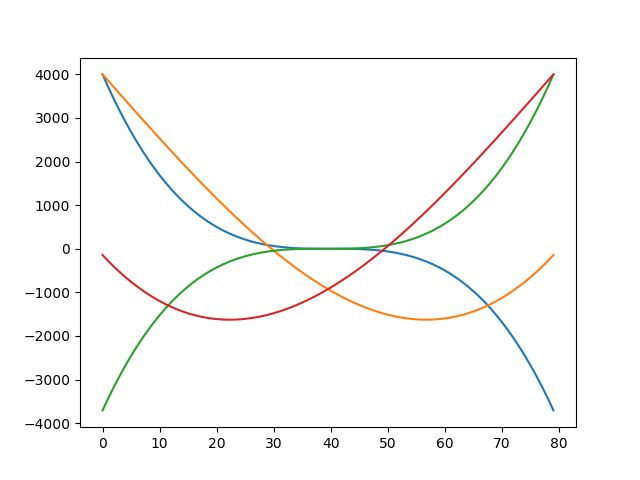

In [5]:
time = []
rad_c = []
rad_adj = []
skew_axis = []
y_axis = []
a_axis = []
neg_a = []
b_axis = []
neg_skew = []
ell_lng = []
ell_srt = []
ell = []
rad_adj_t = []
for i in range (len(z)):
    time.append(i)
    rad_c.append(time[i])
    skew_axis.append(GG[i][i])
    y_axis.append(len(z))
    a_axis.append(GG[(len(z)) - i - 1][i])
    neg_a.append(-(GG[(len(z)) - i - 1][i]))# - 300)
    rad_adj.append(a_axis[i] / skew_axis[i])#skew_axis[i] / a_axis[i])
    b_axis.append(GG[i][(len(z)) - i - 1])
    neg_skew.append(-GG[i][i])
    ell_lng.append(skew_axis[i]**(2/3))
    ell_srt.append(a_axis[i]**(2/1))#**(2/3))
    ell.append(ell_lng[i] - ell_srt[i])
    rad_adj_t.append(neg_a[i] / skew_axis[i])
    #return x_axis

#GG[0][0]

z_axis = list(reversed(skew_axis))  
rev_axis = list(reversed(GG[0]))
rrv_axis = list(reversed(-GG[0]))
x_circ = rad_adj * np.cos(rad_c)
y_circ = rad_adj * np.sin(rad_c)
#plt.plot(skew_axis,GG[0])
plt.plot(skew_axis)
plt.plot(GG[0])
plt.plot(z_axis)
plt.plot(rev_axis)
plt.show()
#x_axis[0]
#a_axis
#b_axis
#ell_srt

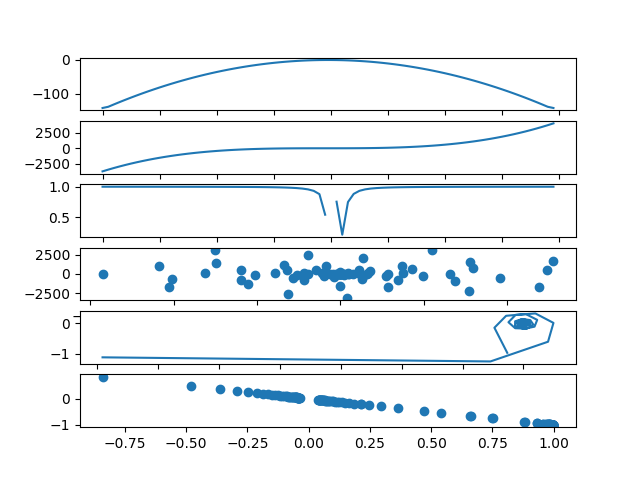

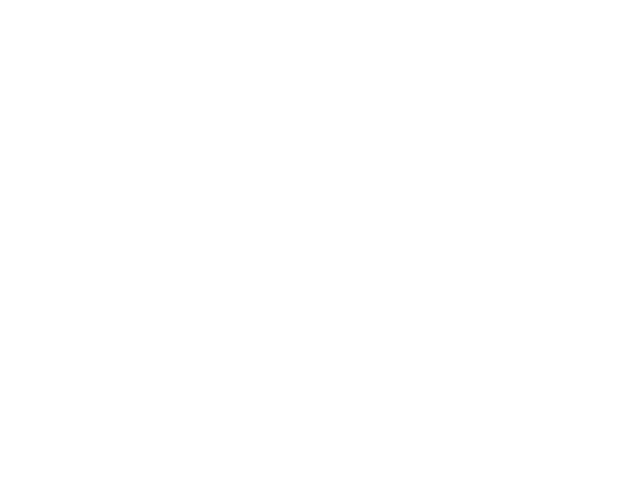

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)
ax1.plot(a_axis)
ax2.plot(z_axis)
ax3.plot(np.cos(rad_adj))
ax4.scatter(a_axis*np.cos(rad_c), skew_axis*np.sin(rad_c))
ax5.plot(x_circ,y_circ)
ax6.scatter((np.cos(rad_adj),np.sin(rad_adj)), ((-np.cos(rad_adj_t),np.sin(rad_adj_t))))
plt.show()

#plt.plot(a_axis)
#plt.plot(z_axis)
plt.show()

In [13]:
#Topology / Misc.

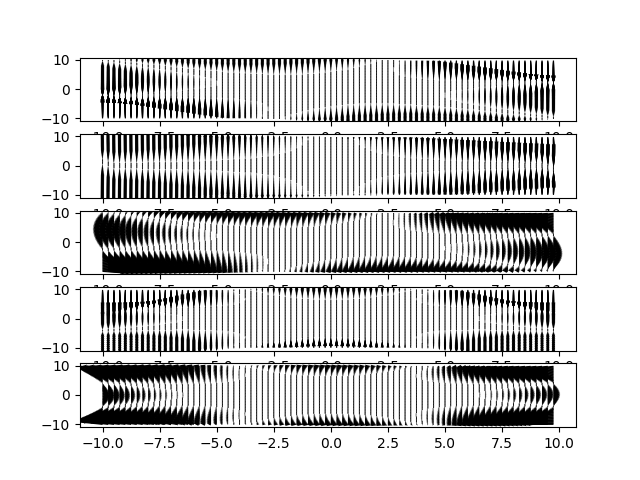

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
ax1.quiver(Z, B, Z, GG)
ax2.quiver(Z, B, Z, HH)
ax3.quiver(Z, B, GG, HH)
ax4.quiver(Z, B, Z, sad)
ax5.quiver(Z, B, sad, GG)
plt.show()

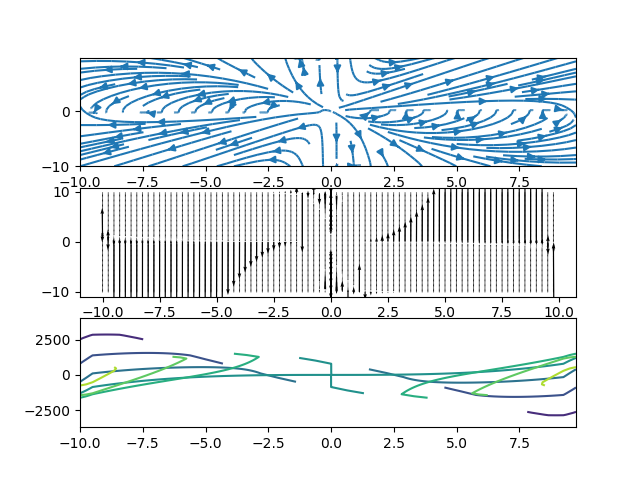

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

#plt.contour(Z,B,II)
#plt.streamplot(Z, B, Z, II)
ax1.streamplot(Z, B, Z, II)
ax2.quiver(Z, B, Z, II)
ax3.contour(Z, GG, HH)
plt.show()

In [7]:
r = np.linspace(0, 1.25, 80)
p = np.linspace(0, 2*np.pi, 80)
R, P = np.meshgrid(r, p)
#Z = ((R**2 - 1)**2)
#ZZ = sf.ellipj(P,R)
X, Y = R*np.cos(P), R*np.sin(P)

a = np.linspace(0, 1.25, 80)
c = np.linspace(0, 1.25, 80)
A, C = np.meshgrid(a, c)


doub_tor = np.sqrt(((A*(((A-1)**2)*(A-2))+(Y**2))**2))
doub_tor_two = np.sqrt((((A**2 + Y**2)**2)-(Y**2)+(A**2))**2)

doub_torr = np.sqrt(((X*(((X-1)**2)*(X-2))+(Y**2))**2))
doub_torr_two = np.sqrt((((X**2 + Y**2)**2)-(Y**2)+(X**2))**2)

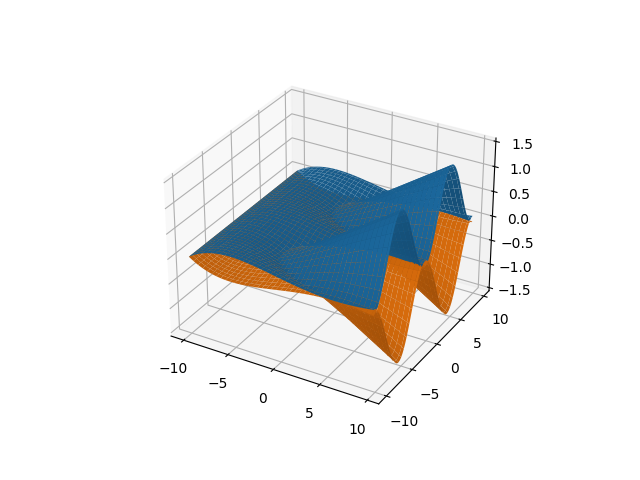

In [8]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax.plot_wireframe(X, Y, FFF)
#ax.contour3D(X, Y, FFF, 30)
#ax.streamplot(Z, B, Z, p_ana)
ax.plot_surface(Z,B,doub_tor)
ax.plot_surface(Z,B,-doub_tor)
plt.show()

In [ ]:
bound = potential[0] / doub_tor[0]
boundd = potential / HH
bounddd = potential / sad #doub_tor
#boundd = potential / doub_tor_bool

plt.plot(boundd)
#plt.plot(bounddd)
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax.plot_wireframe(X, Y, FFF)
#ax.contour3D(Z, B, diff, 30)
ax.plot_surface(Z, B, boundd)
plt.show()

In [3]:
constant_Avg = (6.02 * (10**23)) #count
constant_Boltz = (1.380649 * (10**(-23))) #(J⋅K−1)
constant_Myer = (7.737628943087982 * (10**9)) #m**3/s**2
constant_Newton = (6.6743 * (10**11)) #m3⋅kg−1⋅s−2
constant_Columb = (8.9875517923 * (10**9)) #kg⋅m³⋅s⁻⁴⋅A⁻²
constant_elec = (1.6 * (10**19)) #Columbs
constant_elec_cap = (8.85418782 * (10**-12)) #m-3 kg-1 s4 A2
constant_Ampere = (6.241509074 * (10**18)) #electrons worth of charge moving past a point per second
constant_mag = ((4*3.14159) * (10**-7)) #newtons per ampere squared
constant_gas = constant_Avg * constant_Boltz
constant_Far = constant_Avg * constant_elec
constant_Planck = 6.62607015 * (10**-34) #joule-hertz−1 (or joule-seconds).
elem_Evan = constant_Myer / constant_Avg
constant_strain = (constant_Newton)/constant_Myer #(percent)
#constant_strain / 100, np.log(constant_strain)

In [ ]:
a = []
b = []
n = []
m = []
num = 5
#nn = np.array(n)


def function_elliptic(x,y):
    return x**3 - 3*x*y**3

#for k in range(0, num):
for i in range(1,num):
    for j in range(1,num):
        a.append(i)
        b.append(j)
        #n.append(a[i])
        
        #n.append(len(a))
        #m.append(len(b))

#function_elliptic(nn,nn)
a, b

In [ ]:
aa = np.array(a)
bb = np.array(b)


def function_elliptic(x,y):
    return x**3 - 3*x*y**3
        
#count_zer = function_elliptic(aa,bb) % 7
function_elliptic(aa,bb)
count_zer = (function_elliptic(aa,bb) % num)
count_zer
np.count_nonzero(count_zer==0)

In [ ]:
def primes_method2(n):
    out = list()
    for num in range(1, n+1):
        if all(num % i != 0 for i in range(2, num)):
            out.append(num)
    return out

In [ ]:
primes = (primes_method2(99))
primes